In [5]:
from math import sin, cos, pi
from fem.system import solve_system

import numpy as np
import imp

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import logging
imp.reload(logging)
logging.basicConfig(filename='log.txt', level=logging.DEBUG)
logger = logging.getLogger(__name__)
logging.info('Well?')


/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
def exact(x, y):
    return sin(pi * x) * sin(pi * y)

parameters = (1,  [0, 0], 10)

def known_nodes(v):
    return abs(v[0]) == 1 or abs(v[1]) == 1 or v[0] == 0 or v[1] == 0

def f(x, y):
      return (2*pi**2) * (sin(pi * x)) * (sin(pi * y)) + 10 * (sin(pi * x) * sin(pi * y))

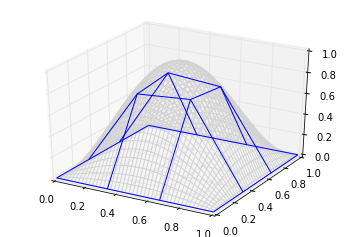

In [7]:
# Setup the axis to plot on
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the exact solution
X = np.linspace(0,1,128)
Y = np.linspace(0,1,128)
X, Y = np.meshgrid(X, Y)
Z = np.sin(pi * X) * np.sin(pi * Y)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='lightgrey')

err3 = []

for N in [3]:
    # Solve the system
    results3 = solve_system(parameters, known_nodes, f, N, exact)
    
    if N == 3:
        # Plot our approximation
        xs, ys = results3['grid']
        U = results3['U']
        ax.plot_wireframe(xs, ys, U, color='blue')
        
    err3.append((N, results3['err']))

In [9]:
results3['U'].max()

0.77639120902914649

In [11]:
results3['A']

array([[ 4.55555556, -1.09259259, -1.09259259,  0.        ],
       [-1.09259259,  4.55555556, -0.09259259, -1.09259259],
       [-1.09259259, -0.09259259,  4.55555556, -1.09259259],
       [ 0.        , -1.09259259, -1.09259259,  4.55555556]])

In [12]:
results3['M']

array([[ 0.05555556,  0.00925926,  0.00925926,  0.        ,  0.        ,
         0.00925926,  0.00925926,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00925926,
         0.00925926],
       [ 0.00925926,  0.05555556,  0.00925926,  0.00925926,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00925926,  0.00925926,  0.00925926,
         0.        ],
       [ 0.00925926,  0.00925926,  0.05555556,  0.00925926,  0.        ,
         0.        ,  0.00925926,  0.00925926,  0.00925926,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.00925926,  0.00925926,  0.05555556,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00925926,  0.00925926,
         0.        ,  0.00925926,  0.00925926,  0.        ,  0.        ,
         0.        ]])

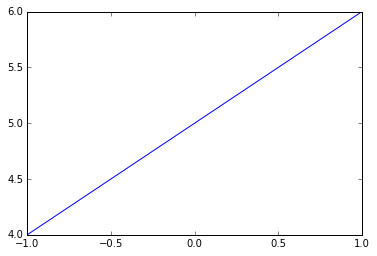

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_profile(f, start=-1, end=1):
    
    xs = np.linspace(start, end, 64)
    ys = [f(x) for x in xs]
    
    return plt.plot(xs, ys)

def f(a, b):
    return lambda t: 0.5*((1 - t)* a + (1 + t)*b)

plot_profile(f(4,6))

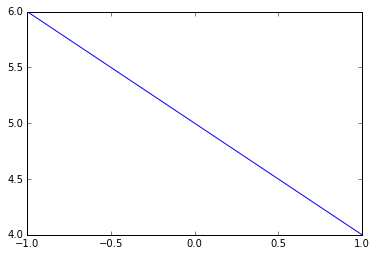

In [6]:
def g(a, b):
    return lambda t: -(2*t - (a + b))/(b - a)

plot_profile(g(4,6))